In [6]:
import calendar
import numpy as np
import datetime
import pandas as pd

all_dates = [i.strftime("%Y-%m-%d") for i in pd.date_range(start="2020-03-30",end="2020-06-29").to_pydatetime().tolist()]

print(all_dates)
# stamp = str(int(calendar.timegm(datetime.datetime.strptime(d, "%Y-%m-%d").timetuple()))) + '000'
narratives = ['benefits/connections/afghanistan', 'benefits/covid', 'benefits/development/energy', 'benefits/development/maritime', 'benefits/development/roads', 'benefits/jobs', 'controversies/china/border', 'controversies/china/debt', 'controversies/china/exploitation', 'controversies/china/funding', 'controversies/china/naval', 'controversies/china/uighur', 'controversies/pakistan/army', 'controversies/pakistan/bajwa', 'controversies/pakistan/baloch', 'controversies/pakistan/students', 'leadership/bajwa', 'leadership/khan', 'leadership/sharif', 'opposition/kashmir', 'opposition/propaganda']
selected_nar = ['controversies/pakistan/students', 'leadership/sharif', 'leadership/bajwa', 'controversies/china/uighur', 'controversies/china/border', 'benefits/development/roads', 'controversies/pakistan/baloch', 'benefits/jobs', 'opposition/propaganda', 'benefits/development/energy', 'controversies/pakistan/bajwa']
print(len(narratives))

['2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08', '2020

In [7]:
import json
import pandas as pd
gt_path = 'twitter_time_series_to_6_29.json'

with open(gt_path, 'r') as f:
    d = json.loads(f.read())
dd = {k: pd.read_json(v, orient='columns') for k, v in d.items()}
def get_gt_total(nar):
    if nar == 'other':
        tmp = [sum([dd[nar]['EventCount'][i] for nar in narratives if nar not in selected_nar]) for i in all_dates]
    else:
        tmp = [dd[nar]['EventCount'][i] for i in all_dates]
    return sum(tmp)
def get_gt_series(nar, norm='max'):
    if nar == 'other':
        tmp = [sum([dd[nar]['EventCount'][i] for nar in narratives if nar not in selected_nar]) for i in all_dates]
    else:
        tmp = [dd[nar]['EventCount'][i] for i in all_dates]
    if norm == 'max':
        x = max(*tmp)
    elif norm == 'sum':
        x = sum(tmp)
    else:
        x = 1
    x = max(x, 1e-5)
    return [i / x for i in tmp]


In [11]:
import json
import pandas as pd
west_path = 'news_west_300_time_series_to_6_29.json'

with open(west_path, 'r') as f:
    w = json.loads(f.read())
ww = {k: pd.read_json('{"EventCount":' + v + '}', orient='columns') for k, v in w.items()}
def get_west_total(nar):
    if nar == 'other':
        return [0 for i in all_dates]
    else:
        tmp = [ww[nar]['EventCount'][i] for i in all_dates]
    return sum(tmp)
def get_west_series(nar, norm='max'):
    if nar == 'other':
        return [0 for i in all_dates]
    else:
        tmp = [ww[nar]['EventCount'][i] for i in all_dates]
    if norm == 'max':
        x = max(*tmp)
    elif norm == 'sum':
        x = sum(tmp)
    else:
        x = 1
    x = max(x, 1e-5)
    return [i / x for i in tmp]

west_series = dict()
for n in selected_nar:
    west_series[n] = {i:ww[n]['EventCount'][i] for i in all_dates}
west_series['other'] = {i:0 for i in all_dates}

KeyError: '2020-03-31'

In [4]:
from collections import defaultdict
narrative_list = narratives
string_match_series = {i:defaultdict(float) for i in narratives}
leidos_bert_series = {i:defaultdict(float) for i in narratives}
westclass_series = {i:defaultdict(float) for i in narratives}
for fn in ['../news_results.json']:
    with open(f'{fn}') as fin:
        for line in fin:
            js = json.loads(line)
            if js['relevance_prediction']:
                if js['leidos_bert_prediction'] and js['date']:
                    n = js['leidos_bert_prediction'][0]
    #                 if n not in selected_nar:
    #                     n = 'other'
                    leidos_bert_series[n][js['date']] += 1
                if js['string_match_prediction'] and js['date']:
                    n = js['string_match_prediction'][0]
    #                 if n not in selected_nar:
    #                     n = 'other'
                    string_match_series[n][js['date']] += 1
                if js['westclass_prediction'] and js['date']:
                    n = js['westclass_prediction'][0]
    #                 if n not in selected_nar:
    #                     n = 'other'
                    westclass_series[n][js['date']] += 1

In [15]:
narrative_list = narratives
print(narrative_list)
print(all_dates)

['benefits/connections/afghanistan', 'benefits/covid', 'benefits/development/energy', 'benefits/development/maritime', 'benefits/development/roads', 'benefits/jobs', 'controversies/china/border', 'controversies/china/debt', 'controversies/china/exploitation', 'controversies/china/funding', 'controversies/china/naval', 'controversies/china/uighur', 'controversies/pakistan/army', 'controversies/pakistan/bajwa', 'controversies/pakistan/baloch', 'controversies/pakistan/students', 'leadership/bajwa', 'leadership/khan', 'leadership/sharif', 'opposition/kashmir', 'opposition/propaganda']
['2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020

In [14]:

def dump_series(news_event, fn):
    news_time = dict()
    for n in narrative_list:
        tmp = dict()
        for d in all_dates:
            stamp = str(int(calendar.timegm(datetime.datetime.strptime(d, "%Y-%m-%d").timetuple()))) + '000'
            tmp[stamp] = news_event[n][d]
        news_time[n] = tmp
#     json.dump({i:json.dumps({'EventCount': news_time[i]}) for i in news_time}, open(fn, 'w'))
    json.dump({i:json.dumps(news_time[i]) for i in news_time}, open(fn, 'w'))
# dump_series(west_series, 'westclass_series_to_6_29.json')
dump_series(leidos_bert_series, 'leidos_bert_series.json')
dump_series(string_match_series, 'string_match_series.json')

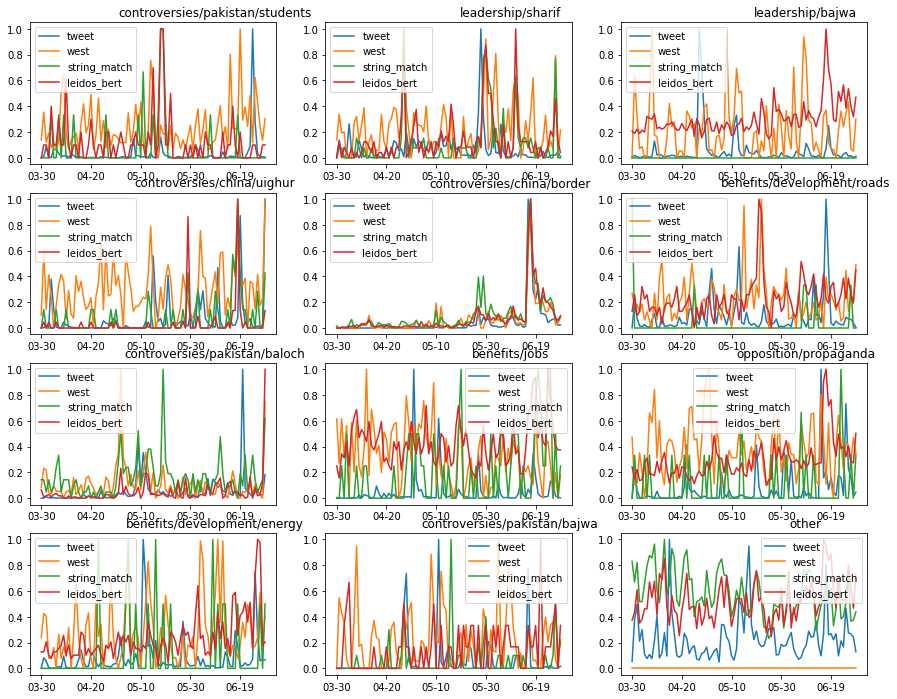

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def get_series(nar, s, norm='max'):
    tmp = [s[nar][i] for i in all_dates]
    if norm == 'max':
        x = max(*tmp)
    elif norm == 'sum':
        x = sum(tmp)
    else:
        x = 1
    x = max(x, 1e-5)
    return [i / x for i in tmp]

fig, _axes = plt.subplots(4, 3, figsize=(15, 12))
axes = []
for i in _axes:
    for ax in i:
        axes.append(ax)
for nar, ax in zip(selected_nar + ['other'], axes):
    ax.set_title(nar, position=(0.75, 0.85))
    ax.plot(get_gt_series(nar), label='tweet')
    ax.plot(get_west_series(nar), label='west')
    ax.plot(get_series(nar, string_match_series), label='string_match')
    ax.plot(get_series(nar, leidos_bert_series), label='leidos_bert')
    ax.legend()
    
    ax.set_xticks(np.arange(len(all_dates))[::20])
    ax.set_xticklabels([i[-5:] for i in all_dates[::20]])
fig.show()

KeyError: 'other'

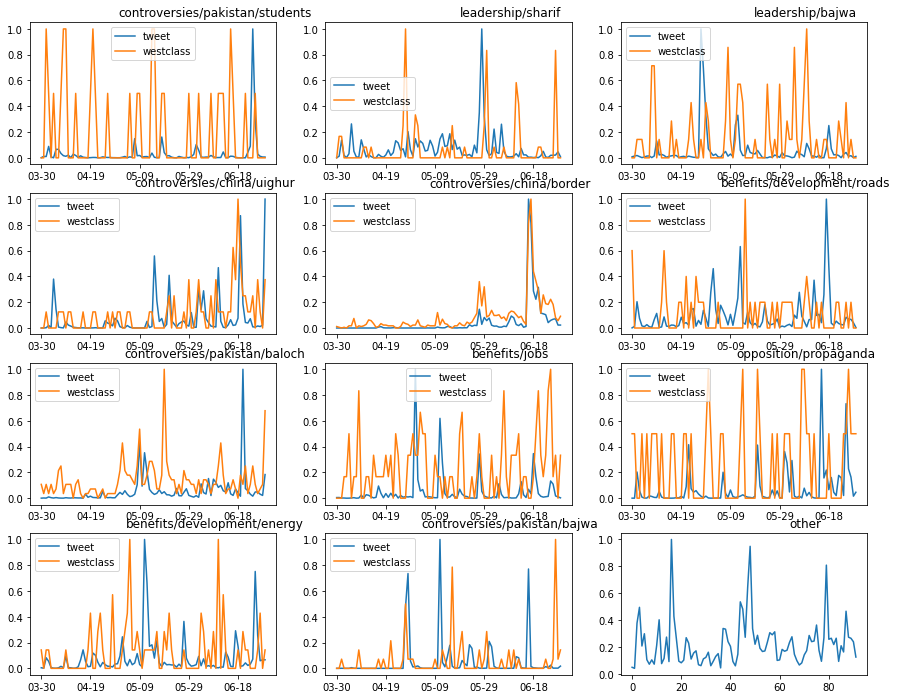

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def get_series(nar, s, norm='max'):
    tmp = [s[nar][i] for i in all_dates]
    if norm == 'max':
        x = max(*tmp)
    elif norm == 'sum':
        x = sum(tmp)
    else:
        x = 1
    x = max(x, 1e-5)
    return [i / x for i in tmp]

fig, _axes = plt.subplots(4, 3, figsize=(15, 12))
axes = []
for i in _axes:
    for ax in i:
        axes.append(ax)
for nar, ax in zip(selected_nar + ['other'], axes):
    ax.set_title(nar, position=(0.75, 0.85))
    ax.plot(get_gt_series(nar), label='tweet')
#     ax.plot(get_west_series(nar), label='west')
    ax.plot(get_series(nar, westclass_series), label='westclass')
#     ax.plot(get_series(nar, leidos_bert_series), label='leidos_bert')
    ax.legend()
    
    ax.set_xticks(np.arange(len(all_dates))[::20])
    ax.set_xticklabels([i[-5:] for i in all_dates[::20]])
fig.show()

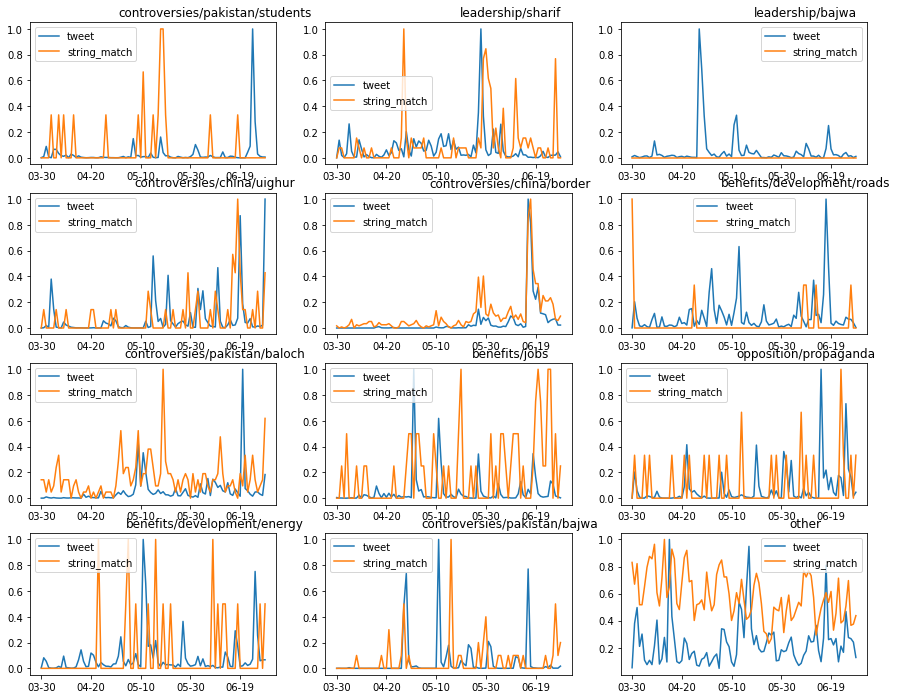

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def get_series(nar, s, norm='max'):
    tmp = [s[nar][i] for i in all_dates]
    if norm == 'max':
        x = max(*tmp)
    elif norm == 'sum':
        x = sum(tmp)
    else:
        x = 1
    x = max(x, 1e-5)
    return [i / x for i in tmp]

fig, _axes = plt.subplots(4, 3, figsize=(15, 12))
axes = []
for i in _axes:
    for ax in i:
        axes.append(ax)
for nar, ax in zip(selected_nar + ['other'], axes):
    ax.set_title(nar, position=(0.75, 0.85))
    ax.plot(get_gt_series(nar), label='tweet')
#     ax.plot(get_west_series(nar), label='west')
    ax.plot(get_series(nar, string_match_series), label='string_match')
#     ax.plot(get_series(nar, leidos_bert_series), label='leidos_bert')
    ax.legend()
    
    ax.set_xticks(np.arange(len(all_dates))[::20])
    ax.set_xticklabels([i[-5:] for i in all_dates[::20]])
fig.show()

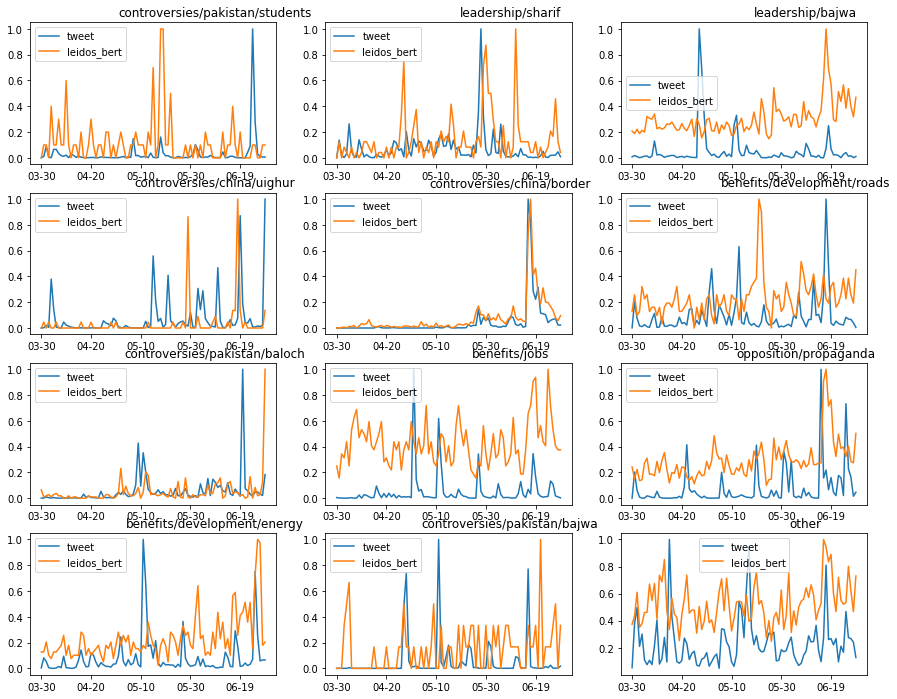

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def get_series(nar, s, norm='max'):
    tmp = [s[nar][i] for i in all_dates]
    if norm == 'max':
        x = max(*tmp)
    elif norm == 'sum':
        x = sum(tmp)
    else:
        x = 1
    x = max(x, 1e-5)
    return [i / x for i in tmp]

fig, _axes = plt.subplots(4, 3, figsize=(15, 12))
axes = []
for i in _axes:
    for ax in i:
        axes.append(ax)
for nar, ax in zip(selected_nar + ['other'], axes):
    ax.set_title(nar, position=(0.75, 0.85))
    ax.plot(get_gt_series(nar), label='tweet')
#     ax.plot(get_west_series(nar), label='west')
#     ax.plot(get_series(nar, string_match_series), label='string_match')
    ax.plot(get_series(nar, leidos_bert_series), label='leidos_bert')
    ax.legend()
    
    ax.set_xticks(np.arange(len(all_dates))[::20])
    ax.set_xticklabels([i[-5:] for i in all_dates[::20]])
fig.show()

In [18]:
for target_method in ['leidos_bert', 'string_match']:
    selected_dates = [i.strftime("%Y-%m-%d") for i in pd.date_range(start="2020-03-30",end="2020-07-06").to_pydatetime().tolist()]
    selected_stamp = dict()
    date2stamp = dict()
    for d in selected_dates:
        stamp = str(int(calendar.timegm(datetime.datetime.strptime(d, "%Y-%m-%d").timetuple()))) + '000'
        selected_stamp[stamp] = d
        date2stamp[d] = stamp

    gdelt = defaultdict(dict)

    for ec, series in json.load(open('../gdelt_time_series.json')).items():
        series = json.loads(series)
        for i in selected_dates:
            gdelt[ec][i]  = series[date2stamp[i]]

    # west classification
    import numpy as np
    eventcode_doc = defaultdict(int)
    eventcode_nar_score = defaultdict(lambda:defaultdict(float))
    with open('../news_results.json') as fin:
        for line in fin:
            js = json.loads(line)
            if js['relevance_prediction'] and js['eventcode'] and js[f'{target_method}_score']:
                for ec in js['eventcode']:
                    eventcode_doc[ec] += 1
                    for nar in narratives:
                        score = js['leidos_bert_score'][nar]
                        eventcode_nar_score[ec][nar] += score

    eventCodeMap = {"010": 0, "011": 1, "012": 2, "013": 3, "014": 4, "015": 5, "016": 6, "017": 7, "018": 8, "019": 9, "020": 10, "021": 11, "0211": 12, "0212": 13, "0213": 14, "0214": 15, "022": 16, "023": 17, "0231": 18, "0232": 19, "0233": 20, "0234": 21, "024": 22, "0241": 23, "0242": 24, "0243": 25, "0244": 26, "025": 27, "0253": 28, "0254": 29, "0256": 30, "026": 31, "027": 32, "028": 33, "030": 34, "031": 35, "0311": 36, "0312": 37, "0314": 38, "032": 39, "033": 40, "0331": 41, "0332": 42, "0333": 43, "0334": 44, "034": 45, "0341": 46, "0344": 47, "035": 48, "0351": 49, "0353": 50, "0356": 51, "036": 52, "037": 53, "038": 54, "039": 55, "040": 56, "041": 57, "042": 58, "043": 59, "044": 60, "045": 61, "046": 62, "050": 63, "051": 64, "052": 65, "053": 66, "054": 67, "055": 68, "056": 69, "057": 70, "060": 71, "061": 72, "062": 73, "063": 74, "064": 75, "070": 76, "071": 77, "072": 78, "073": 79, "074": 80, "075": 81, "080": 82, "081": 83, "0811": 84, "0813": 85, "0814": 86, "082": 87, "083": 88, "0831": 89, "0833": 90, "0834": 91, "084": 92, "0841": 93, "0842": 94, "085": 95, "086": 96, "0861": 97, "0862": 98, "0863": 99, "087": 100, "0871": 101, "0872": 102, "0873": 103, "0874": 104, "090": 105, "091": 106, "092": 107, "093": 108, "094": 109, "100": 110, "101": 111, "1013": 112, "1014": 113, "102": 114, "1031": 115, "1041": 116, "1043": 117, "1044": 118, "105": 119, "1051": 120, "1053": 121, "1054": 122, "1056": 123, "106": 124, "110": 125, "111": 126, "112": 127, "1121": 128, "1122": 129, "1123": 130, "1124": 131, "1125": 132, "113": 133, "114": 134, "115": 135, "116": 136, "120": 137, "121": 138, "122": 139, "123": 140, "1231": 141, "1232": 142, "1233": 143, "124": 144, "1241": 145, "1243": 146, "1244": 147, "1246": 148, "125": 149, "126": 150, "127": 151, "128": 152, "129": 153, "130": 154, "131": 155, "1312": 156, "1313": 157, "132": 158, "1322": 159, "133": 160, "134": 161, "136": 162, "137": 163, "138": 164, "1383": 165, "1384": 166, "139": 167, "140": 168, "141": 169, "1411": 170, "1412": 171, "142": 172, "143": 173, "144": 174, "145": 175, "150": 176, "151": 177, "152": 178, "153": 179, "154": 180, "160": 181, "161": 182, "162": 183, "1621": 184, "1623": 185, "163": 186, "164": 187, "166": 188, "170": 189, "171": 190, "1711": 191, "1712": 192, "172": 193, "1721": 194, "1722": 195, "1723": 196, "1724": 197, "173": 198, "174": 199, "175": 200, "180": 201, "181": 202, "182": 203, "1821": 204, "1822": 205, "1823": 206, "183": 207, "1831": 208, "1832": 209, "184": 210, "185": 211, "186": 212, "190": 213, "191": 214, "192": 215, "193": 216, "194": 217, "195": 218, "196": 219, "202": 220, "203": 221}
    # narrativeMap = {"benefits/development/energy": 0, "benefits/development/roads": 1, "benefits/jobs": 2, "controversies/china/border": 3, "controversies/china/uighur": 4, "controversies/pakistan/bajwa": 5, "controversies/pakistan/baloch": 6, "controversies/pakistan/students": 7, "leadership/bajwa": 8, "leadership/sharif": 9, "opposition/propaganda": 10}
    # twitterGdeltMat_norm = [[0.0 for j in range(len(narrativeMap))] for i in range(len(eventCodeMap))]
    # twitterGdeltMat_raw = [[0.0 for j in range(len(narrativeMap))] for i in range(len(eventCodeMap))]
    twitterGdeltMat_norm = {i:{j:0.0 for j in eventCodeMap} for i in selected_nar + ['other']}
    twitterGdeltMat_raw = {i:{j:0.0 for j in eventCodeMap} for i in selected_nar + ['other']}
    for n2 in eventCodeMap:
        for n1 in selected_nar + ['other']:
            twitterGdeltMat_norm[n1][n2] = eventcode_nar_score[n2][n1] / eventcode_doc[n2] if eventcode_doc[n2] > 0 else 0.0
            twitterGdeltMat_raw[n1][n2] = eventcode_nar_score[n2][n1]
    #         twitterGdeltMat_norm[eventCodeMap[n2]][narrativeMap[n1]] = eventcode_nar_score[n2][n1] / eventcode_doc[n2] if eventcode_doc[n2] > 0 else 0.0
    #         twitterGdeltMat_raw[eventCodeMap[n2]][narrativeMap[n1]] = eventcode_nar_score[n2][n1]

    # json.dump({'eventCodeMap':eventCodeMap,'narrativeMap':narrativeMap,'twitterGdeltMat':twitterGdeltMat_norm,'youtubeGdeltMat':twitterGdeltMat_norm}, open(f'/shared/data2/qiuwenda/CP5/output_to_0531/corrmat_west_{k}_norm.json', 'w'))
    json.dump(twitterGdeltMat_norm, open(f'news_gdelt_{target_method}_corr_to_7_06.json', 'w'))
